In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv("results.csv")
df.head()

,Unnamed: 0,Estimate_init_pregrasp,Time_init_pregrasp,Difference_init_pregrasp,Estimate_pregrasp_grasp,Time_pregrasp_grasp,Difference_pregrasp_grasp,Time_grip,Estimate_grasp_postgrasp,Time_grasp_postgrasp,Difference_grasp_postgrasp,Grasp
0,0,3.144333,3.179,0.034667,1.808117,1.840,0.031883,2.393,1.810847,1.842,0.031153,SUCCESS
1,1,3.069175,3.094,0.024825,1.816558,1.855,0.038442,2.406,1.810055,1.843,0.032945,SUCCESS
2,2,3.049147,3.072,0.022853,1.824156,1.860,0.035844,2.397,1.834475,1.875,0.040525,SUCCESS
3,3,3.144424,3.180,0.035576,1.801178,1.830,0.028822,2.410,1.973553,2.006,0.032447,SUCCESS
4,4,3.144621,3.175,0.030379,1.801453,1.826,0.024547,2.398,1.809109,1.852,0.042891,SUCCESS


### Total Time

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['total_time'], label='total_time', marker='o')

plt.title('Variation of total_time Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('sim seconds')
plt.legend()
plt.grid(True)

plt.show()

### Solution calculation time

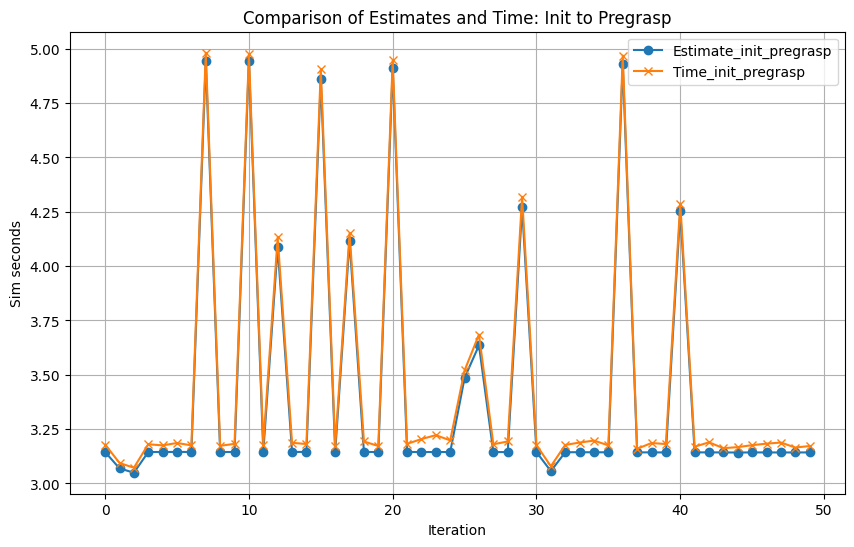

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(df['solution_time_sim'], label='solution_time_sim', marker='o')
plt.plot(df['solution_time_real'], label='solution_time_real', marker='x')

plt.title('Comparison of Solution calculation time: Init to Pregrasp')
plt.xlabel('Iteration')
plt.ylabel('Sim seconds')
plt.legend()
plt.grid(True)
plt.show()

### Pregrasp movement

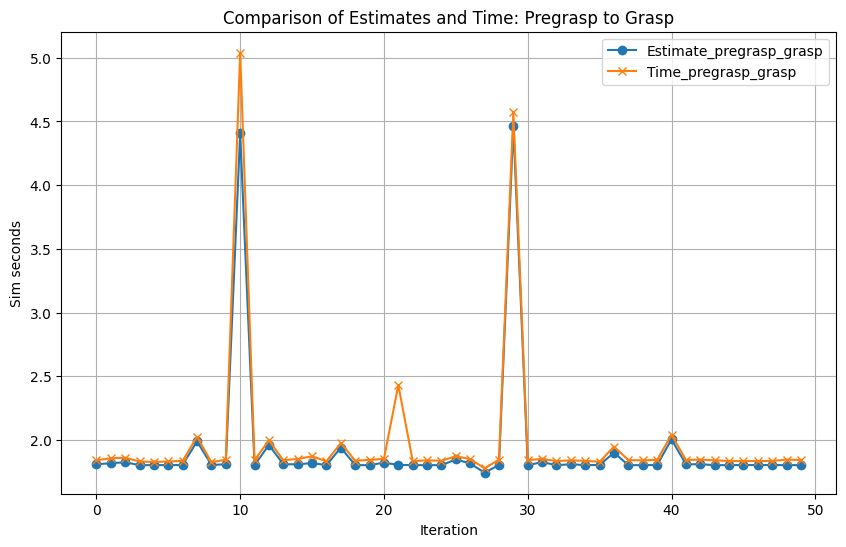

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(df['grasp_pose_estimate'], label='grasp_pose_estimate', marker='o')
plt.plot(df['grasp_pose_time'], label='grasp_pose_time', marker='x')

plt.title('Comparison of Estimates and Time: Pregrasp')
plt.xlabel('Iteration')
plt.ylabel('Sim seconds')
plt.legend()
plt.grid(True)

plt.show()

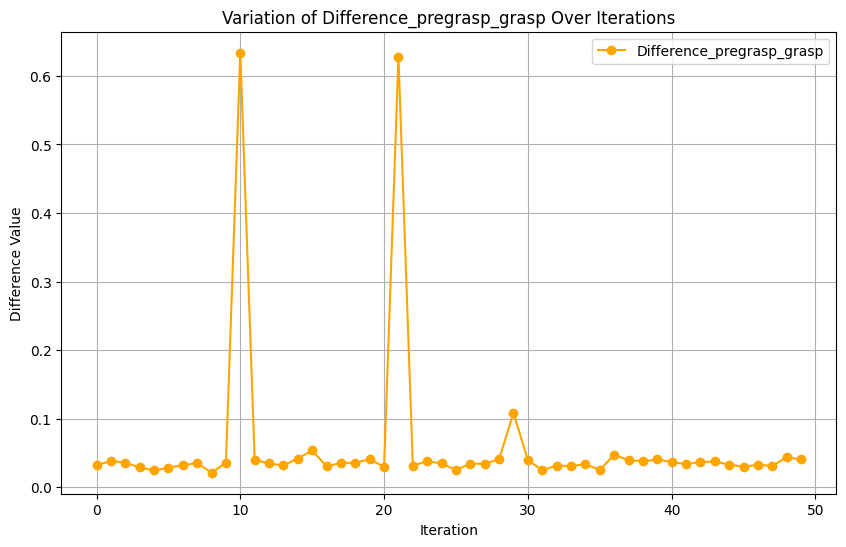

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(df['offset'], label='Difference_pregrasp_grasp', marker='o', color='orange')
plt.title('Variation of offset of estimate and actual time')

plt.xlabel('Iteration')
plt.ylabel('Difference Value')
plt.legend()
plt.grid(True)

plt.show()

### Gripping

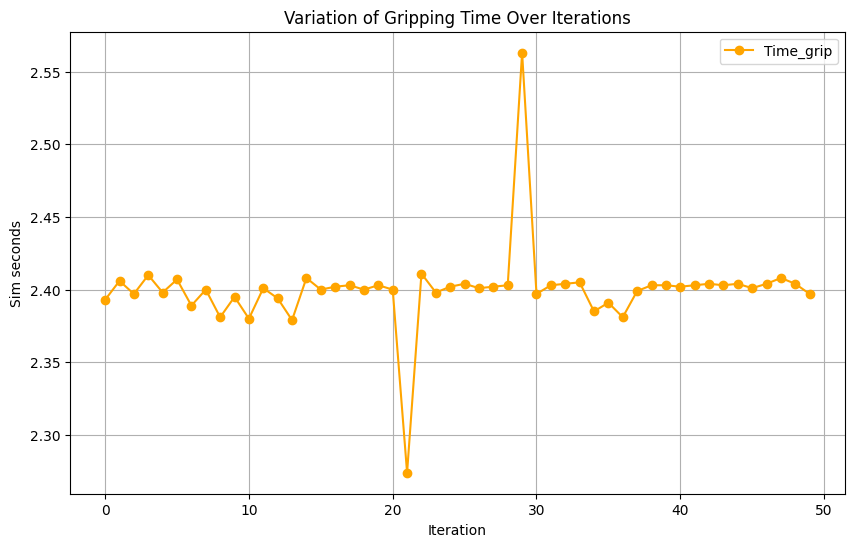

In [48]:
values = list(df.Time_grip)
plt.figure(figsize=(10, 6))
plt.plot(df['grip_time'], label='grip_time', marker='o', color='orange')

plt.title('Variation of Gripping Time Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Sim seconds')
plt.legend()
plt.grid(True)

plt.show()

### Grasp to Postgrasp

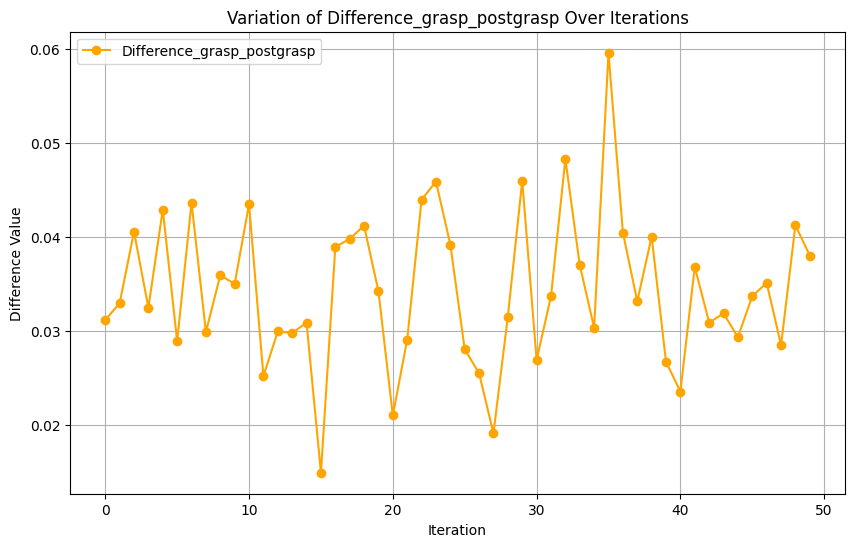

In [50]:
values = list(df.Difference_grasp_postgrasp)
plt.figure(figsize=(10, 6))
plt.plot(df['Difference_grasp_postgrasp'], label='Difference_grasp_postgrasp', marker='o', color='orange')
plt.title('Variation of Difference_grasp_postgrasp Over Iterations')

plt.xlabel('Iteration')
plt.ylabel('Difference Value')
plt.legend()
plt.grid(True)

plt.show()